# TASK 1: IMPORT LIBRARIES AND DATASETS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [5]:
sales_df = pd.read_csv('IceCreamData.csv')

In [6]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [8]:
sales_df.head(3)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289


In [9]:
sales_df.tail(8)

,Temperature,Revenue
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [11]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Calculate the average and maximum temperature and revenue using an alternative method**

In [12]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [13]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

# TASK 2: PERFORM DATA VISUALIZATION

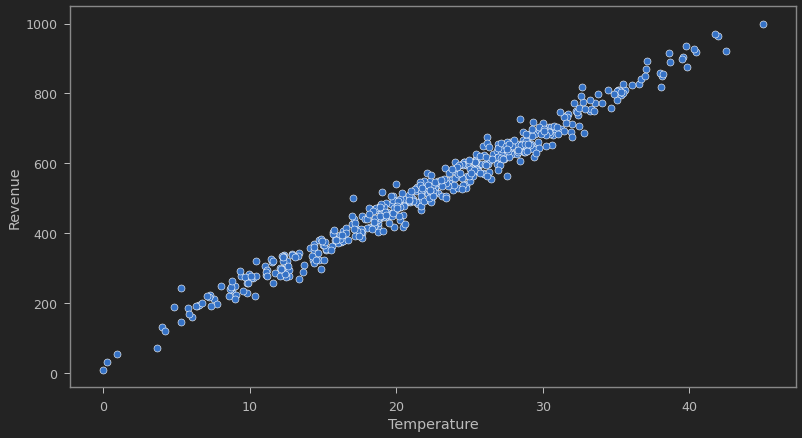

In [14]:
plt.figure(figsize = (13,7))
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df)

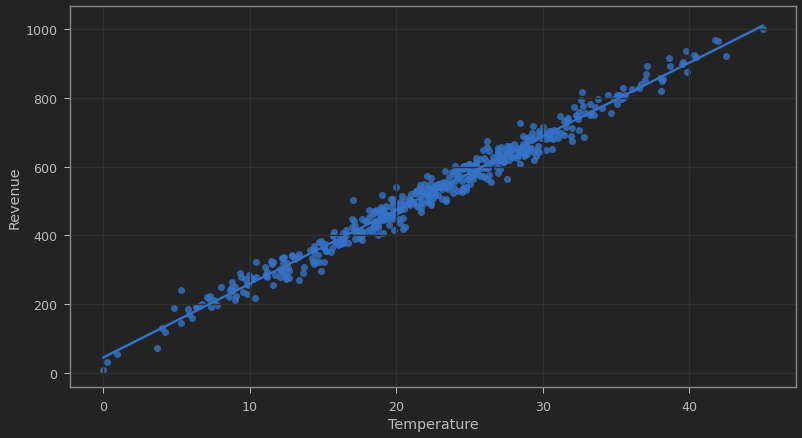

In [15]:
plt.figure(figsize = (13, 7))
sns.regplot( x = 'Temperature', y = 'Revenue', data= sales_df)
plt.grid()

# TASK 3: CREATE TESTING AND TRAINING DATASET

In [16]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [22]:
X  = sales_df['Temperature']
y = sales_df['Revenue']

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X_train.shape

(400, 1)

In [36]:
y_train.shape

(400, 1)

In [37]:
X_test.shape

(100, 1)

In [38]:
y_test.shape

(100, 1)

# TASK 4: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [39]:
X_train.shape

(400, 1)

In [40]:
y_train.shape

(400, 1)

In [42]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = True)
SimpleLinearRegression.fit(X_train, y_train)


LinearRegression()

In [43]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.49018691]]
Linear Model Coeff(b) [44.50532842]


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Set the fit_intercept attribute to False and retrain the model. What do you notice? comment on the result.**

# TASK 5: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

Text(0.5, 1.0, 'Revenue Generated vs Temperature')

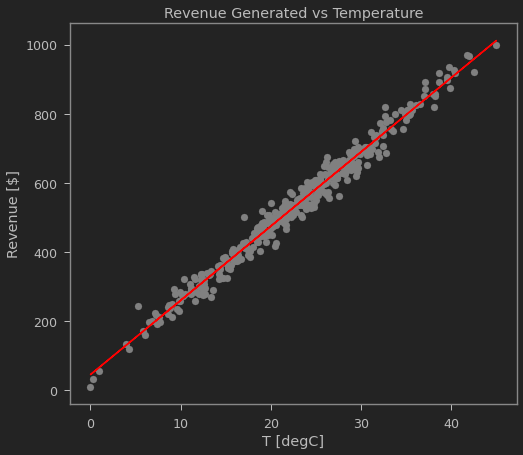

In [47]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs Temperature')


In [48]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.9755558849285176

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

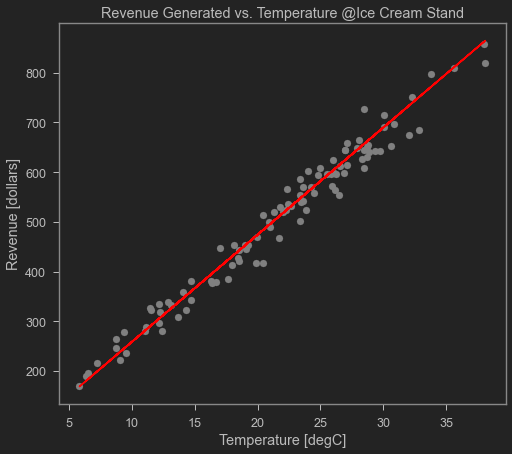

Text(0.5, 1.0, 'Revenue Generated vs Temperature')

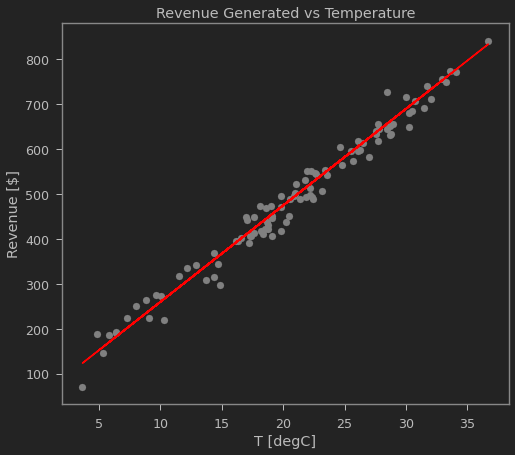

In [49]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs Temperature')


In [50]:
# Use the trained model to generate predictions

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[474.30906662]]
